In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings('ignore') #Importing the necessary libraries

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [3]:
Data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
Data.shape # Checking the shape

(8425, 23)

In [5]:
Data.columns # Checking the columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
Data.info() # Checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [7]:
Data.isnull().sum() # To check null values

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
Data.dropna(inplace=True) # Dropping the null values

In [9]:
Data.reset_index(drop=True, inplace=True)

In [10]:
Data['RainTomorrow']

0       Yes
1       Yes
2        No
3        No
4       Yes
       ... 
3785     No
3786    Yes
3787     No
3788     No
3789     No
Name: RainTomorrow, Length: 3790, dtype: object

In [11]:
Data.drop('Date',axis=1,inplace=True) # Dropping the date column

In [12]:
Data['RainTomorrow'].unique() # Checking the unique value for the target variable

array(['Yes', 'No'], dtype=object)

In [13]:
Data['RainTomorrow'].value_counts() # To check the count

No     2901
Yes     889
Name: RainTomorrow, dtype: int64

In [14]:
Data.Location.unique() # Checking the unique values for Location

array(['CoffsHarbour', 'Williamtown', 'Melbourne', 'Brisbane',
       'PerthAirport', 'Darwin'], dtype=object)

In [15]:
Data.Location.value_counts()

PerthAirport    1159
Melbourne       1126
CoffsHarbour     552
Brisbane         524
Darwin           249
Williamtown      180
Name: Location, dtype: int64

<AxesSubplot:xlabel='Location', ylabel='count'>

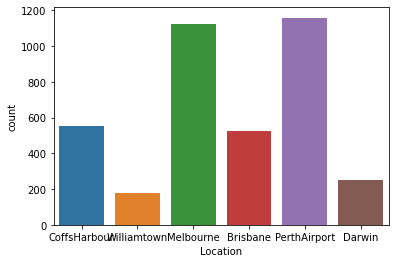

In [16]:
sns.countplot(Data['Location'])

Text(0.5, 1.0, 'Possibility of Rain Tomorrow by Min Temp')

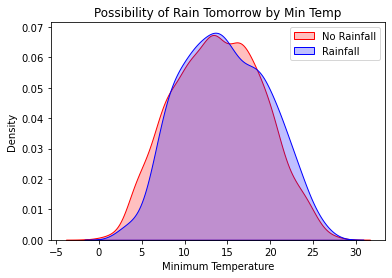

In [17]:
ax = sns.kdeplot(Data.MinTemp[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.MinTemp[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Minimum Temperature')
ax.set_title('Possibility of Rain Tomorrow by Min Temp')

In [18]:
# Highest possibility of rain is when the minimum temperature is at 13
# No possibility of rain is when the minimum temperature is at 10

Text(0.5, 1.0, 'Possibility of Rain Tomorrow by Max Temp')

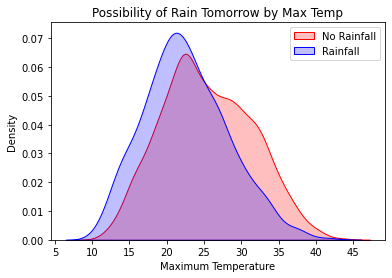

In [19]:
ax = sns.kdeplot(Data.MaxTemp[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.MaxTemp[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Maximum Temperature')
ax.set_title('Possibility of Rain Tomorrow by Max Temp')

In [20]:
# Highest possibility of rain is when the max temperature is at 20
# No possibility of rain is when the max temperature is at 23

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

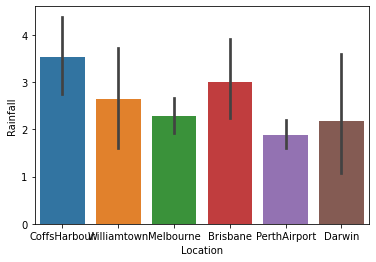

In [21]:
sns.barplot(x='Location',y='Rainfall',data=Data) # Checking which area received the highest rainfall

In [22]:
# Coffs Harbour received the highest rainfall while Perth Airport received the lowest

<AxesSubplot:xlabel='RainTomorrow', ylabel='Rainfall'>

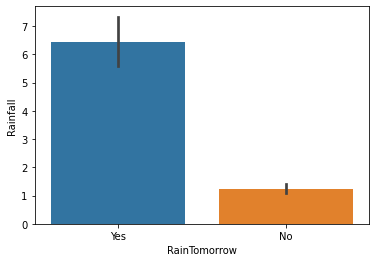

In [23]:
sns.barplot(x='RainTomorrow',y='Rainfall',data=Data) # Possibility of Rainfall based on highest rain

In [24]:
# Therefore it can be said that usually there is no rain between 0-1.5 mm
# Chances of rainfall increases more after 1.5 mm 
# It can also be said, given the rest of the location- Coffs Harbour has the highest chance of getting rainfall next day

<AxesSubplot:xlabel='RainTomorrow', ylabel='Evaporation'>

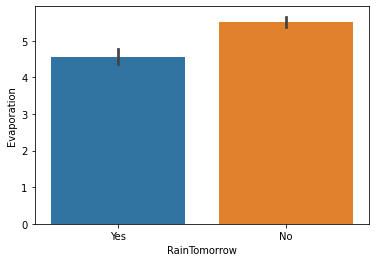

In [25]:
sns.barplot(x='RainTomorrow',y='Evaporation',data=Data) # Checking chances of rainfall based on evaportaion

In [26]:
# Chances of rainfall is maximum where evaporation is between 4-5.
# Evaporation higher than 5 has no chance of rainfall

<AxesSubplot:xlabel='RainTomorrow', ylabel='Sunshine'>

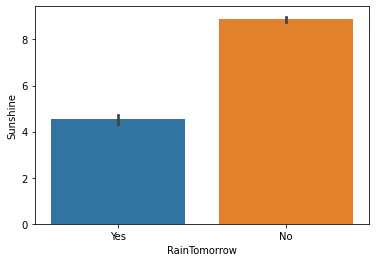

In [27]:
sns.barplot(x='RainTomorrow',y='Sunshine',data=Data) # Checking chances of rainfall based on sunshine

In [28]:
# Places with sunshine higher than 5 has no chance of rainfall than places where sunshine is between 5 

In [29]:
Data['WindGustDir'].unique()

array(['ESE', 'E', 'WSW', 'ENE', 'NNE', 'NNW', 'S', 'SW', 'SSE', 'SSW',
       'SE', 'NE', 'N', 'NW', 'WNW', 'W'], dtype=object)

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

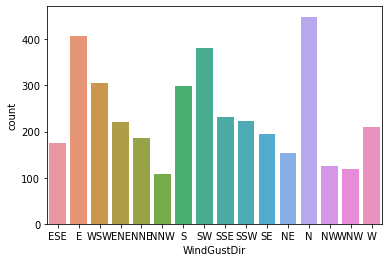

In [30]:
sns.countplot(Data['WindGustDir'])

In [31]:
# Highest windspeed is from North and East 

Text(0.5, 1.0, 'Possibility of Rainfall by Wind Gust Speed')

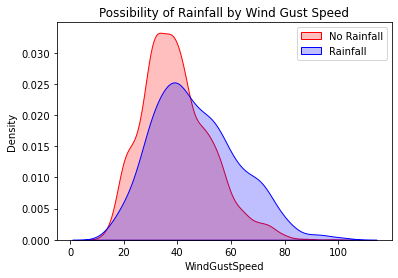

In [32]:
ax = sns.kdeplot(Data.WindGustSpeed[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.WindGustSpeed[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('WindGustSpeed')
ax.set_title('Possibility of Rainfall by Wind Gust Speed')

In [33]:
# Chances of rainfall is more where wind gust speed is at 40 and no rainfall is more where wind gust speed is between 25-30 

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

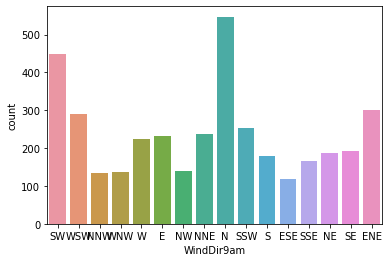

In [34]:
sns.countplot(Data['WindDir9am'])

In [35]:
# Wind direction at 9 AM is highest from North and south west

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

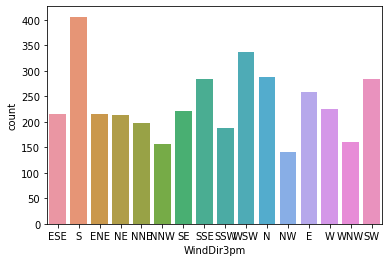

In [36]:
sns.countplot(Data['WindDir3pm'])

In [37]:
# Wind direction at 3 PM is highest from South and south west

Text(0.5, 1.0, 'Possibility of Rainfall by Wind Speed at 9 AM')

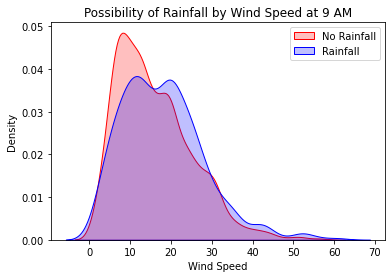

In [38]:
ax = sns.kdeplot(Data.WindSpeed9am[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.WindSpeed9am[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Wind Speed')
ax.set_title('Possibility of Rainfall by Wind Speed at 9 AM')

In [39]:
# Possibility of rainfall is higher at 9 AM where wind speed is between 10-30
# No chance of rain is higher where speed is less than 10

Text(0.5, 1.0, 'Possibility of Rainfall by WindSpeed3pm')

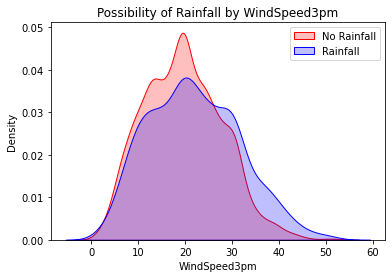

In [40]:
ax = sns.kdeplot(Data.WindSpeed3pm[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.WindSpeed3pm[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('WindSpeed3pm')
ax.set_title('Possibility of Rainfall by WindSpeed3pm')

Text(0.5, 1.0, 'Possibility of Rainfall by Humidity9am')

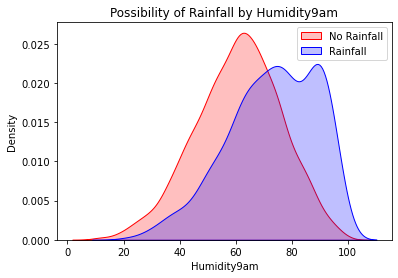

In [41]:
ax = sns.kdeplot(Data.Humidity9am[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.Humidity9am[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Humidity9am')
ax.set_title('Possibility of Rainfall by Humidity9am')

Text(0.5, 1.0, 'Possibility of Rainfall by Humidity3pm')

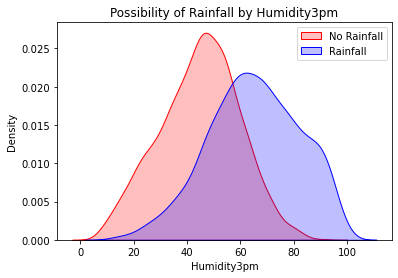

In [42]:
ax = sns.kdeplot(Data.Humidity3pm[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.Humidity3pm[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Humidity3pm')
ax.set_title('Possibility of Rainfall by Humidity3pm')

Text(0.5, 1.0, 'Possibility of Rainfall by Pressure9am')

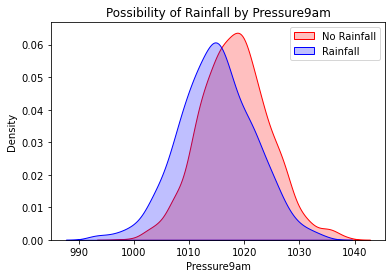

In [43]:
ax = sns.kdeplot(Data.Pressure9am[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.Pressure9am[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Pressure9am')
ax.set_title('Possibility of Rainfall by Pressure9am')

Text(0.5, 1.0, 'Possibility of Rainfall by Pressure3pm')

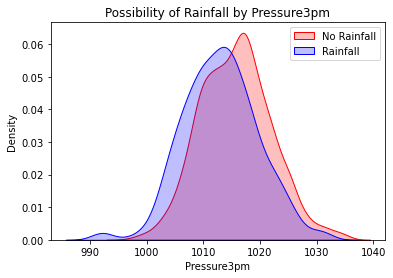

In [44]:
ax = sns.kdeplot(Data.Pressure3pm[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.Pressure3pm[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Pressure3pm')
ax.set_title('Possibility of Rainfall by Pressure3pm')

Text(0.5, 1.0, 'Possibility of Rainfall by Cloud9am')

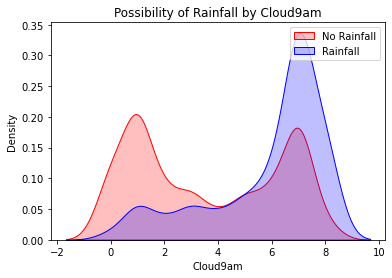

In [45]:
ax = sns.kdeplot(Data.Cloud9am[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.Cloud9am[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Cloud9am')
ax.set_title('Possibility of Rainfall by Cloud9am')

Text(0.5, 1.0, 'Possibility of Rainfall by Cloud3pm')

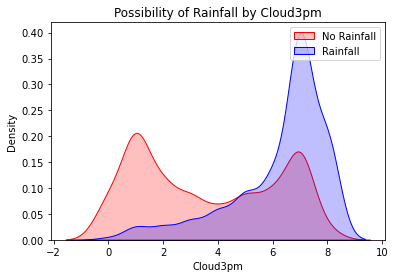

In [46]:
ax = sns.kdeplot(Data.Cloud3pm[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.Cloud3pm[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Cloud3pm')
ax.set_title('Possibility of Rainfall by Cloud3pm')

Text(0.5, 1.0, 'Possibility of Rainfall by Temp9am')

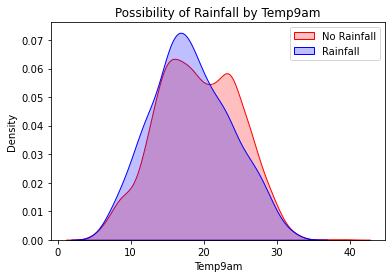

In [47]:
ax = sns.kdeplot(Data.Temp9am[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.Temp9am[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Temp9am')
ax.set_title('Possibility of Rainfall by Temp9am')

Text(0.5, 1.0, 'Possibility of Rainfall by Temp3pm')

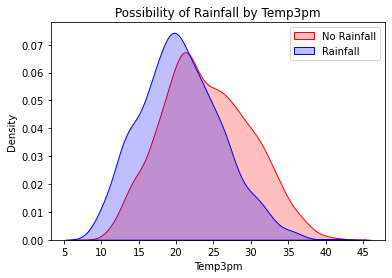

In [48]:
ax = sns.kdeplot(Data.Temp3pm[(Data["RainTomorrow"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(Data.Temp3pm[(Data["RainTomorrow"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No Rainfall","Rainfall"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Temp3pm')
ax.set_title('Possibility of Rainfall by Temp3pm')

### Inference

#### In the afternoon,chances of rain fall in less where speed is at 20
#### In the morning, humidity between 80 to 100 has more chance of rainfall and in the afternoon at 60. However no chance of rainfall in the morning if the humidity is below 80 and afternoon below 60
#### No chances of rainfall is more where the air pressure is between 1015 and 1020
#### There is more chances of rainfall when cloud is between 8 to 10 oktas
#### There is more chances of rainfall where temperature is between 15 to 20 degree centigrade

In [49]:
Data['RainTomorrow']=Data['RainTomorrow'].replace({'Yes':1,'No':0})

In [50]:
Data['RainTomorrow']

0       1
1       1
2       0
3       0
4       1
       ..
3785    0
3786    1
3787    0
3788    0
3789    0
Name: RainTomorrow, Length: 3790, dtype: int64

In [51]:
Data['RainToday'].value_counts()

No     2901
Yes     889
Name: RainToday, dtype: int64

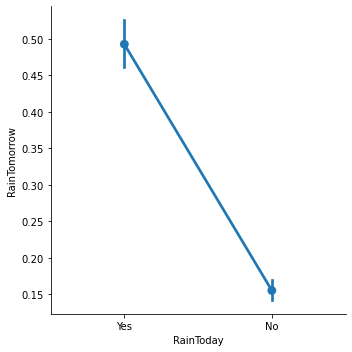

In [52]:
sns.catplot(x='RainToday',y='RainTomorrow',data=Data,kind='point') # checking whether places which received rainfall today has the chance of getting it tomorrow

In [53]:
# There is a high chnace of places to get a ranfall tomorrow who got rainfall today

In [54]:
Data_dummies = pd.get_dummies(Data)
Data_dummies.head() # Getting the dummies of all categorical data type

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,19.8,27.1,24.4,8.6,9.0,35.0,17.0,22.0,83.0,60.0,...,0,0,0,0,0,0,0,0,0,1
1,18.7,25.6,6.8,3.8,3.4,33.0,17.0,13.0,85.0,90.0,...,1,0,0,0,0,0,0,0,0,1
2,16.5,25.5,16.8,2.8,6.1,19.0,6.0,9.0,84.0,65.0,...,0,0,0,0,0,0,0,0,0,1
3,18.5,26.9,0.0,3.2,11.0,30.0,7.0,20.0,68.0,60.0,...,0,0,0,0,0,0,0,0,1,0
4,18.2,28.2,0.0,6.8,9.0,50.0,13.0,35.0,67.0,68.0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

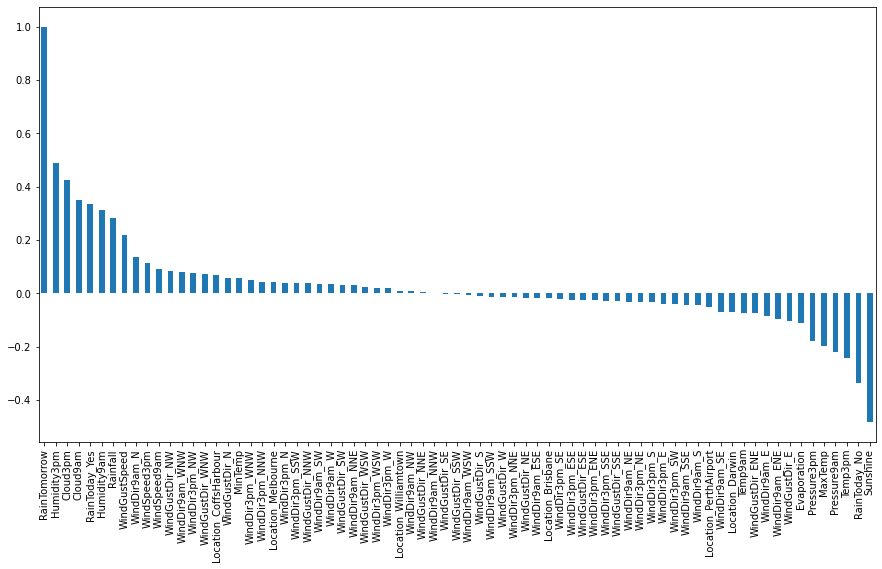

In [55]:
# getting corelation of all the above categorical data with Churning
plt.figure(figsize=(15,8))
Data_dummies.corr()['RainTomorrow'].sort_values(ascending = False).plot(kind='bar')

#### It can be said that Humidity at 3 PM, Cloud at 3 PM, Today's rainfall, total rainfall, wind gust speed all are positively related to Rain Tomorrow.

#### Similarly- Sunshine, no rain today, pressure at 9 AM, evaporation are all negatively related

In [56]:
enc= LabelEncoder() #Encoding the object data type

In [57]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       3790 non-null   object 
 1   MinTemp        3790 non-null   float64
 2   MaxTemp        3790 non-null   float64
 3   Rainfall       3790 non-null   float64
 4   Evaporation    3790 non-null   float64
 5   Sunshine       3790 non-null   float64
 6   WindGustDir    3790 non-null   object 
 7   WindGustSpeed  3790 non-null   float64
 8   WindDir9am     3790 non-null   object 
 9   WindDir3pm     3790 non-null   object 
 10  WindSpeed9am   3790 non-null   float64
 11  WindSpeed3pm   3790 non-null   float64
 12  Humidity9am    3790 non-null   float64
 13  Humidity3pm    3790 non-null   float64
 14  Pressure9am    3790 non-null   float64
 15  Pressure3pm    3790 non-null   float64
 16  Cloud9am       3790 non-null   float64
 17  Cloud3pm       3790 non-null   float64
 18  Temp9am 

In [58]:
columns=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']
Data[columns] = Data[columns].apply(enc.fit_transform) #Encoding the object data type into int data type

In [59]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       3790 non-null   int32  
 1   MinTemp        3790 non-null   float64
 2   MaxTemp        3790 non-null   float64
 3   Rainfall       3790 non-null   float64
 4   Evaporation    3790 non-null   float64
 5   Sunshine       3790 non-null   float64
 6   WindGustDir    3790 non-null   int32  
 7   WindGustSpeed  3790 non-null   float64
 8   WindDir9am     3790 non-null   int32  
 9   WindDir3pm     3790 non-null   int32  
 10  WindSpeed9am   3790 non-null   float64
 11  WindSpeed3pm   3790 non-null   float64
 12  Humidity9am    3790 non-null   float64
 13  Humidity3pm    3790 non-null   float64
 14  Pressure9am    3790 non-null   float64
 15  Pressure3pm    3790 non-null   float64
 16  Cloud9am       3790 non-null   float64
 17  Cloud3pm       3790 non-null   float64
 18  Temp9am 

In [60]:
Data.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,...,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000,3790.000000
mean,2.629024,14.071029,24.733483,2.451768,5.292533,7.852744,7.245910,41.203958,7.415040,7.663325,...,63.683641,49.435620,1017.488047,1015.037836,4.116623,4.214776,18.963536,23.226201,0.234565,0.234565
std,1.500454,5.161176,6.068364,7.772025,3.642341,3.816696,4.894959,13.857829,4.796248,4.682656,...,16.273443,17.673797,6.560724,6.485755,2.773039,2.647355,5.528374,5.929694,0.423782,0.423782
min,0.000000,-0.700000,10.800000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,...,11.000000,6.000000,992.900000,990.800000,0.000000,0.000000,4.500000,9.400000,0.000000,0.000000
25%,1.000000,10.200000,20.300000,0.000000,2.800000,5.200000,3.000000,31.000000,3.000000,3.000000,...,53.000000,38.000000,1013.100000,1010.400000,1.000000,1.000000,14.900000,19.100000,0.000000,0.000000
50%,3.000000,14.000000,24.100000,0.000000,4.600000,8.900000,8.000000,39.000000,7.000000,8.000000,...,64.000000,49.000000,1017.400000,1015.050000,5.000000,5.000000,18.700000,22.700000,0.000000,0.000000
75%,4.000000,17.900000,29.200000,0.800000,7.000000,10.800000,12.000000,50.000000,12.000000,12.000000,...,75.000000,61.000000,1021.700000,1019.300000,7.000000,7.000000,23.200000,27.300000,0.000000,0.000000
max,5.000000,28.500000,43.600000,168.400000,37.000000,13.900000,15.000000,102.000000,15.000000,15.000000,...,99.000000,98.000000,1039.000000,1035.600000,8.000000,8.000000,39.400000,42.400000,1.000000,1.000000


In [61]:
# There is a difference in mean and std deviation in all the columns

In [62]:
X=Data.drop('RainTomorrow',axis=1)
Y=Data['RainTomorrow'] #Seperating the target and classes

In [63]:
Y

0       1
1       1
2       0
3       0
4       1
       ..
3785    0
3786    1
3787    0
3788    0
3789    0
Name: RainTomorrow, Length: 3790, dtype: int64

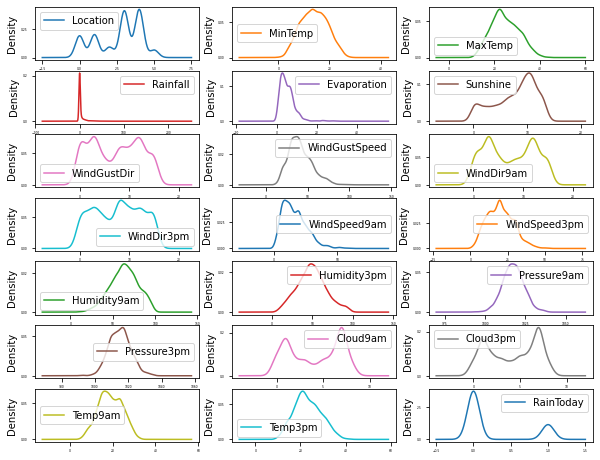

In [64]:
X.plot(kind='kde',subplots=True,layout=(7,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # ploting the data and observing high skewness

In [65]:
# Data is extremely skewed

In [66]:
X.skew().sort_values(ascending=False) #Checking the skewness

Rainfall         7.592966
Evaporation      2.114169
RainToday        1.253358
WindSpeed9am     0.935658
WindGustSpeed    0.699143
WindSpeed3pm     0.356434
Temp3pm          0.239057
MaxTemp          0.237727
Humidity3pm      0.174915
Pressure3pm      0.096222
MinTemp          0.039516
Pressure9am      0.032381
WindDir9am       0.030790
Temp9am          0.029503
WindGustDir      0.004110
WindDir3pm      -0.054372
Cloud9am        -0.128711
Cloud3pm        -0.155781
Humidity9am     -0.194562
Location        -0.510193
Sunshine        -0.591076
dtype: float64

In [67]:
from sklearn.preprocessing import power_transform

In [68]:
New_X=power_transform(X)

In [69]:
pd.DataFrame(New_X,columns=X.columns).skew().sort_values(ascending=False) # transforming the data to reduce skewness

RainToday        1.253358
Rainfall         1.061623
Pressure3pm      0.003865
Evaporation      0.001279
Pressure9am     -0.000278
WindGustSpeed   -0.004561
Temp3pm         -0.021361
MaxTemp         -0.021687
WindSpeed9am    -0.026645
Humidity3pm     -0.027673
WindSpeed3pm    -0.044625
Temp9am         -0.049757
Humidity9am     -0.050080
MinTemp         -0.069765
WindDir9am      -0.222210
WindDir3pm      -0.252130
WindGustDir     -0.259226
Cloud3pm        -0.259858
Cloud9am        -0.260405
Location        -0.346425
Sunshine        -0.398204
dtype: float64

In [70]:
X=pd.DataFrame(New_X,columns=X.columns)

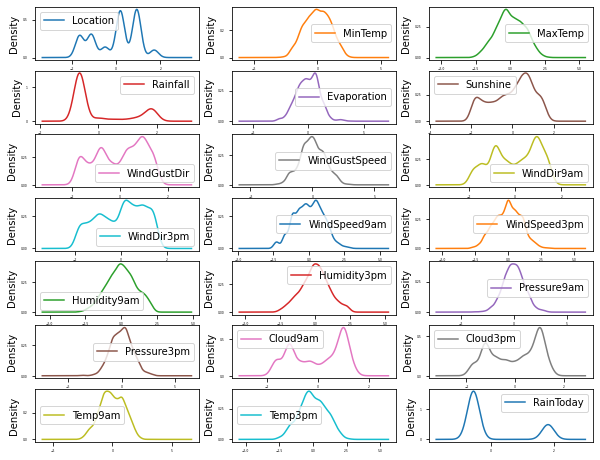

In [71]:
X.plot(kind='kde',subplots=True,layout=(7,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # checking data after transformation

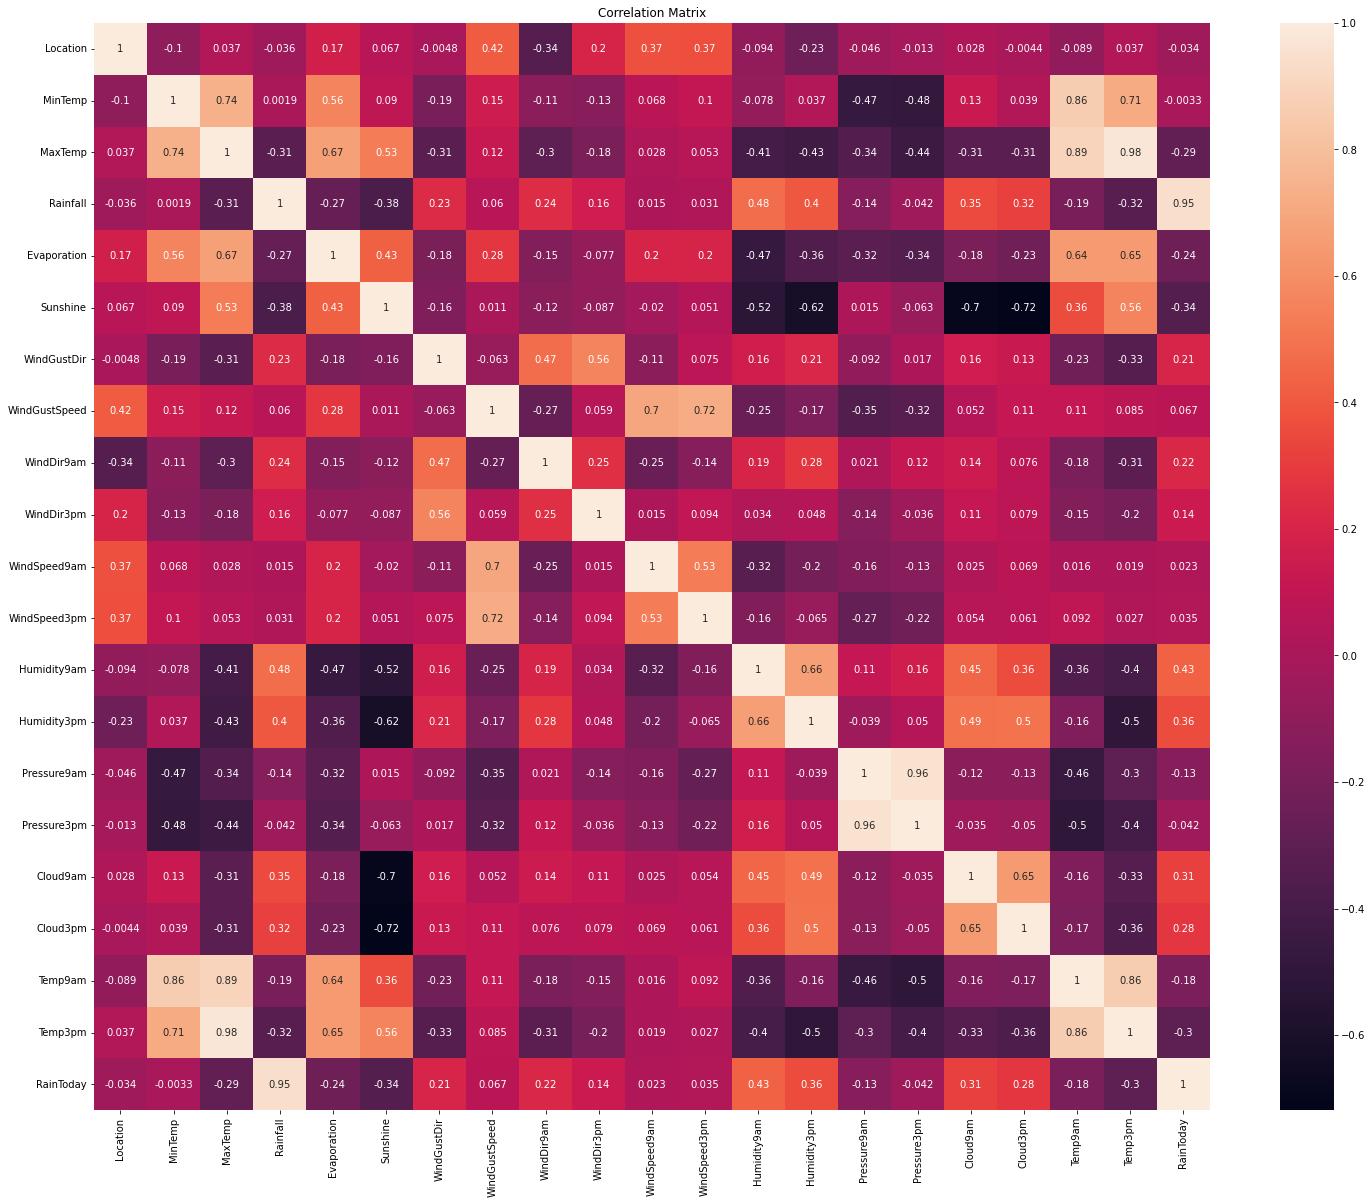

In [72]:
corr_mat=X.corr()
plt.figure(figsize=[25,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation of the feature variables

In [73]:
# There is an issue of multicollinearity, therefore checking with VIF

In [74]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Location,1.783809
1,MinTemp,7.580742
2,MaxTemp,36.630861
3,Rainfall,10.567774
4,Evaporation,2.419080
5,Sunshine,3.888438
6,WindGustDir,1.935268
7,WindGustSpeed,3.620155
8,WindDir9am,1.784503
9,WindDir3pm,1.644461


In [75]:
# Maximum temperature has a multicollinearity of 98% in heatmap and 36 in VIF 
# Rainfall tomorrow is more negatively related to temp 3 PM than maximum temperature.
# Therefore dropping Maximum temperature

In [76]:
X.drop('MaxTemp',axis=1,inplace=True)

In [77]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Location,1.773425
1,MinTemp,7.579867
2,Rainfall,10.521263
3,Evaporation,2.409284
4,Sunshine,3.831122
5,WindGustDir,1.934901
6,WindGustSpeed,3.501690
7,WindDir9am,1.783284
8,WindDir3pm,1.640340
9,WindSpeed9am,2.364625


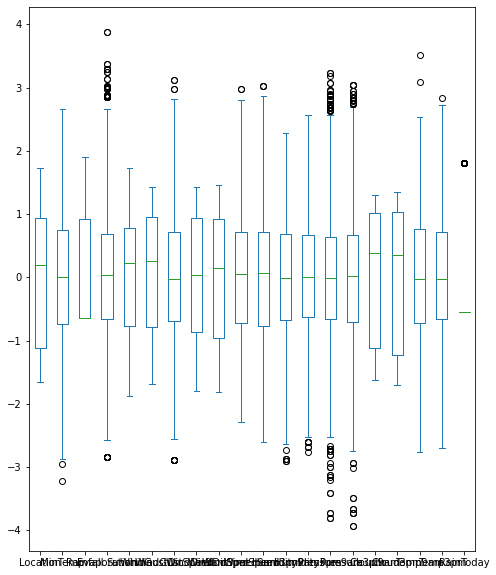

In [78]:
X.plot(kind='box',figsize=(8,10),layout=(7,3))
plt.show() #checking for oultiers

In [79]:
# Data has outliers present

In [80]:
from scipy.stats import zscore

In [81]:
(np.abs(zscore(X)<3)).all()

Location          True
MinTemp           True
Rainfall          True
Evaporation      False
Sunshine          True
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm     False
Humidity9am       True
Humidity3pm       True
Pressure9am      False
Pressure3pm      False
Cloud9am          True
Cloud3pm          True
Temp9am          False
Temp3pm           True
RainToday         True
dtype: bool

In [82]:
# these are the index positions where outlier is present
index = np.where(np.abs(zscore(X))>3)
index

(array([ 567,  571,  578,  583,  589,  592,  610,  617,  657,  661,  668,
         673,  679,  682,  700,  707,  734,  734,  873,  976,  976, 1041,
        1041, 1071, 1071, 1224, 1224, 1238, 1239, 1239, 1297, 1297, 1436,
        1539, 1539, 1604, 1604, 1634, 1634, 1787, 1787, 1801, 1802, 1802,
        2428, 2443, 2625, 2935, 3054, 3054, 3154, 3154, 3391], dtype=int64),
 array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 13,
        14,  6, 13, 14, 13, 14, 13, 14, 13, 14, 10, 13, 14, 13, 14,  6, 13,
        14, 13, 14, 13, 14, 13, 14, 10, 13, 14, 13, 17, 13,  1, 10, 14, 13,
        14, 17], dtype=int64))

In [83]:
New_X = X[(np.abs(zscore(X))<3).all(axis=1)]
New_X

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-1.122369,1.100829,1.890372,1.038631,0.254420,-1.043969,-0.348469,0.944682,-1.215864,0.258698,0.292391,1.206628,0.616814,0.219849,0.453433,0.707778,0.694010,0.559849,0.510371,1.806438
1,-1.122369,0.897890,1.813968,-0.249400,-1.203874,-1.681327,-0.516824,0.944682,0.143626,0.258698,-0.777803,1.338231,2.168878,0.493328,0.787101,0.053939,1.030178,0.382426,-0.341972,1.806438
2,-1.122369,0.487147,1.880119,-0.663414,-0.538708,1.423284,-1.990583,1.429434,-1.215864,-1.244917,-1.336806,1.272347,0.884438,0.614643,0.787101,0.389263,1.030178,0.382426,0.268029,1.806438
3,-1.122369,0.860825,-0.642316,-0.487251,0.839003,-1.333505,-0.784835,0.944682,-1.492369,-1.056719,0.070842,0.241766,0.616814,0.219849,0.254904,-0.688314,0.346724,0.789065,0.573939,-0.553576
4,-1.122369,0.805127,-0.642316,0.643199,0.254420,-0.331689,0.720412,-0.170797,-0.721443,-0.182832,1.586041,0.178921,1.043080,-0.176454,-0.332320,-1.116356,-1.223619,0.911849,0.494411,-0.553576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,-0.498141,2.076950,1.637717,-0.176038,0.311605,-0.331689,-0.033015,-0.861303,-0.493110,-0.438011,0.292391,0.116272,-0.157379,-0.942855,-1.104585,1.012578,1.030178,1.879669,1.624413,1.806438
3786,-0.498141,2.254466,-0.642316,0.440408,-0.590671,-0.786789,0.962188,-1.435533,-1.806229,-0.182832,-0.777803,0.116272,2.317946,-1.081409,-1.280186,0.053939,1.356919,1.981976,0.381917,-0.553576
3787,-0.498141,2.023513,1.886165,0.492985,0.169204,1.270190,-0.187426,-0.386311,-0.061939,-0.182832,0.070842,0.495069,0.344816,-1.158463,-1.376213,0.053939,0.694010,1.862593,1.422832,1.806438
3788,-0.498141,2.130303,-0.642316,0.093277,-0.273291,0.618048,-0.187426,-1.803880,1.460037,0.546046,-0.777803,-0.132310,0.508564,-0.973628,-1.264001,1.012578,1.030178,1.708595,1.349887,-0.553576


In [84]:
New_X.shape

(3751, 20)

In [85]:
Y_new=Y.drop(index[0],axis=0)
Y_new  #removing the outliers from target variables

0       1
1       1
2       0
3       0
4       1
       ..
3785    0
3786    1
3787    0
3788    0
3789    0
Name: RainTomorrow, Length: 3751, dtype: int64

In [86]:
Y_new.shape

(3751,)

In [87]:
Scalar=StandardScaler()

In [88]:
X_Scaled=Scalar.fit_transform(New_X)
X_Scaled

array([[-1.11478381,  1.1029334 ,  1.89423372, ...,  0.56175908,
         0.50939081,  1.81027096],
       [-1.11478381,  0.89962562,  1.81774114, ...,  0.38354199,
        -0.34490653,  1.81027096],
       [-1.11478381,  0.48813628,  1.88396882, ...,  0.38354199,
         0.26649377,  1.81027096],
       ...,
       [-0.48924062,  2.02729421,  1.89002151, ...,  1.87033652,
         1.42394472,  1.81027096],
       [-0.48924062,  2.13427805, -0.64138896, ...,  1.71564873,
         1.35083244, -0.55240349],
       [-0.48924062,  2.02729421, -0.64138896, ...,  1.9217714 ,
         1.5973597 , -0.55240349]])

# Logistic Regression

In [89]:
LR=LogisticRegression()

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=58)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test) # Testing the prediction of test data

In [91]:
LR_accuracy=accuracy_score(y_test,pred_test)*100
LR_accuracy

86.28495339547271

In [92]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[533,  31],
       [ 72, 115]], dtype=int64)

# Decision Tree

In [93]:
DT=DecisionTreeClassifier()

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=58)
DT.fit(X_train,y_train)
pred_test=DT.predict(X_test) # Testing the prediction of test data

In [95]:
DT_accuracy=accuracy_score(y_test,pred_test)*100
DT_accuracy

87.35019973368841

In [96]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[517,  47],
       [ 48, 139]], dtype=int64)

# Random Forest

In [97]:
RF=RandomForestClassifier()

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=58)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test) # Testing the prediction of test data

In [99]:
RF_accuracy=accuracy_score(y_test,pred_test)*100
RF_accuracy

91.61118508655126

In [100]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[550,  14],
       [ 49, 138]], dtype=int64)

# Gradient Boosting

In [101]:
GB=GradientBoostingClassifier()

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y_new,test_size=0.20,random_state=58)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test) # Testing the prediction of test data

In [103]:
GB_accuracy=accuracy_score(y_test,pred_test)*100
GB_accuracy

88.28229027962716

In [104]:
Conf_Mat=confusion_matrix(y_test,pred_test)
Conf_Mat

array([[539,  25],
       [ 63, 124]], dtype=int64)

# Cross Validation for LR

In [106]:
for i in range(2,6):
    LR_Val=cross_val_score(LR,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is 0.8184568585643213
The cross validation score for 3 is 0.8437789501731947
The cross validation score for 4 is 0.8408461769518014
The cross validation score for 5 is 0.8429794940079894


# Cross Validation for DT

In [108]:
for i in range(2,6):
    LR_Val=cross_val_score(LR,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is 0.8184568585643213
The cross validation score for 3 is 0.8437789501731947
The cross validation score for 4 is 0.8408461769518014
The cross validation score for 5 is 0.8429794940079894


# Cross Validation for RF

In [110]:
for i in range(2,5):
    RF_Val=cross_val_score(RF,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean())

The cross validation score for 2 is 0.823524946695096
The cross validation score for 3 is 0.8592321875832667
The cross validation score for 4 is 0.8661671441542099


# Cross Validation for GB

In [111]:
for i in range(2,6):
    GB_Val=cross_val_score(GB,X_Scaled,Y_new,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean())

The cross validation score for 2 is 0.7694191897654584
The cross validation score for 3 is 0.7779082334132693
The cross validation score for 4 is 0.8515091488737135
The cross validation score for 5 is 0.7792859298712826


In [112]:
# From the accuracy score as well as cross validation scores it can be said Random Forest Classifier is the best model for the dataset

In [113]:
x=PrettyTable()
x.field_names=['Model Name','Accuracy Score','Cross Validation Score']
x.add_row(['Logistic Regression','86%','84%'])
x.add_row(['Decision Tree Classifier','87%','84%'])
x.add_row(['Random Tree Regressor','91%','86%'])
x.add_row(['Gradient Boosting','88%','77%'])

print(x)

+--------------------------+----------------+------------------------+
|        Model Name        | Accuracy Score | Cross Validation Score |
+--------------------------+----------------+------------------------+
|   Logistic Regression    |      86%       |          84%           |
| Decision Tree Classifier |      87%       |          84%           |
|  Random Tree Regressor   |      91%       |          86%           |
|    Gradient Boosting     |      88%       |          77%           |
+--------------------------+----------------+------------------------+


# Hypertuning Parameter

In [114]:
rcf=RandomForestClassifier()

In [115]:
parameters={'criterion':["entropy","ginny"],'max_depth':(list(range(5,15))),'min_samples_split':(list(range(2,4))),'min_samples_leaf':(list(range(2,3)))}
clf=GridSearchCV(rcf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'ginny'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [2], 'min_samples_split': [2, 3]})

In [116]:
clf.best_params_ #taking the best parameters

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [118]:
rcf=RandomForestClassifier(criterion='entropy',max_depth=14,min_samples_leaf=2,min_samples_split=3,random_state=58)
rcf.fit(X_train,y_train) # Training the model with the best parameters
pred_test=rcf.predict(X_test) # Testing the prediction 

In [119]:
RF_accuracy=accuracy_score(y_test,pred_test)*100
RF_accuracy

91.34487350199734

In [138]:
# The accuracy before hypertuning parameter is more than the accuracy after hypertuning.

# Saving the model for tomorrow's rainfall 

In [139]:
import pickle
filename='Rainfall Prediction 1.pkl'
pickle.dump(RF,open(filename,'wb')) ##saving the model

# Predicting the total rainfall

In [141]:
Data2=pd.concat([New_X,Y_new],axis=1)

In [142]:
Data2

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-1.122369,1.100829,1.890372,1.038631,0.254420,-1.043969,-0.348469,0.944682,-1.215864,0.258698,...,1.206628,0.616814,0.219849,0.453433,0.707778,0.694010,0.559849,0.510371,1.806438,1
1,-1.122369,0.897890,1.813968,-0.249400,-1.203874,-1.681327,-0.516824,0.944682,0.143626,0.258698,...,1.338231,2.168878,0.493328,0.787101,0.053939,1.030178,0.382426,-0.341972,1.806438,1
2,-1.122369,0.487147,1.880119,-0.663414,-0.538708,1.423284,-1.990583,1.429434,-1.215864,-1.244917,...,1.272347,0.884438,0.614643,0.787101,0.389263,1.030178,0.382426,0.268029,1.806438,0
3,-1.122369,0.860825,-0.642316,-0.487251,0.839003,-1.333505,-0.784835,0.944682,-1.492369,-1.056719,...,0.241766,0.616814,0.219849,0.254904,-0.688314,0.346724,0.789065,0.573939,-0.553576,0
4,-1.122369,0.805127,-0.642316,0.643199,0.254420,-0.331689,0.720412,-0.170797,-0.721443,-0.182832,...,0.178921,1.043080,-0.176454,-0.332320,-1.116356,-1.223619,0.911849,0.494411,-0.553576,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,-0.498141,2.076950,1.637717,-0.176038,0.311605,-0.331689,-0.033015,-0.861303,-0.493110,-0.438011,...,0.116272,-0.157379,-0.942855,-1.104585,1.012578,1.030178,1.879669,1.624413,1.806438,0
3786,-0.498141,2.254466,-0.642316,0.440408,-0.590671,-0.786789,0.962188,-1.435533,-1.806229,-0.182832,...,0.116272,2.317946,-1.081409,-1.280186,0.053939,1.356919,1.981976,0.381917,-0.553576,1
3787,-0.498141,2.023513,1.886165,0.492985,0.169204,1.270190,-0.187426,-0.386311,-0.061939,-0.182832,...,0.495069,0.344816,-1.158463,-1.376213,0.053939,0.694010,1.862593,1.422832,1.806438,0
3788,-0.498141,2.130303,-0.642316,0.093277,-0.273291,0.618048,-0.187426,-1.803880,1.460037,0.546046,...,-0.132310,0.508564,-0.973628,-1.264001,1.012578,1.030178,1.708595,1.349887,-0.553576,0


In [143]:
X_New=Data.drop('Rainfall',axis=1)
New_Y=Data['Rainfall'] # Selecting the target and features

In [144]:
X_Scaled=Scalar.fit_transform(X_New)
X_Scaled

array([[-1.08583074,  1.11015923,  0.3900276 , ...,  0.46784292,
         1.80643768,  1.80643768],
       [-1.08583074,  0.89700138,  0.14281139, ..., -0.39234864,
         1.80643768,  1.80643768],
       [-1.08583074,  0.47068567,  0.12633031, ...,  0.2148454 ,
         1.80643768, -0.5535757 ],
       ...,
       [-0.4192777 ,  2.09843655,  1.32944919, ...,  1.47983299,
         1.80643768, -0.5535757 ],
       [-0.4192777 ,  2.21470447,  1.37889243, ...,  1.39550048,
        -0.5535757 , -0.5535757 ],
       [-0.4192777 ,  2.09843655,  1.5766654 , ...,  1.682231  ,
        -0.5535757 , -0.5535757 ]])

# Ridge Regression

In [145]:
Ridge=Ridge()

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,New_Y,test_size=0.20,random_state=50)
Ridge.fit(X_train,y_train)
pred_test=Ridge.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 40.99857295098276


# Lasso Regression

In [148]:
Lasso=Lasso()

In [149]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,New_Y,test_size=0.20,random_state=50)
Lasso.fit(X_train,y_train)
pred_test=Lasso.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 38.54093347673378


# Decsion Tree Regressor

In [150]:
DT= DecisionTreeRegressor()

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,New_Y,test_size=0.20,random_state=50)
DT.fit(X_train,y_train)
pred_test=DT.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 43.736804587652735


# Random Forest Regressor

In [152]:
RF= DecisionTreeRegressor()

In [153]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,New_Y,test_size=0.20,random_state=50)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 27.90329832020668


# Cross Validation for Ridge

In [155]:
for i in range(2,6):
    Rid_Val=cross_val_score(Ridge,X_Scaled,New_Y,cv=i)
    print("The cross validation score for",i,"is",Rid_Val.mean()*100)

The cross validation score for 2 is 31.979676667084885
The cross validation score for 3 is 33.88542668825967
The cross validation score for 4 is 31.78369372816413
The cross validation score for 5 is 35.23851269038823


# Cross Validation for DT

In [160]:
for i in range(2,6):
    DT_Val=cross_val_score(DT,X_Scaled,New_Y,cv=i)
    print("The cross validation score for",i,"is",DT_Val.mean()*100)

The cross validation score for 2 is -15.507053810603487
The cross validation score for 3 is -28.545188339823586
The cross validation score for 4 is -20.89432565864838
The cross validation score for 5 is -11.400722101417383


# Cross Valiadtion for Lasso

In [157]:
for i in range(2,6):
    Lass_Val=cross_val_score(Lasso,X_Scaled,New_Y,cv=i)
    print("The cross validation score for",i,"is",Lass_Val.mean()*100)

The cross validation score for 2 is 29.7182613048487
The cross validation score for 3 is 30.531092317984797
The cross validation score for 4 is 29.453700399425685
The cross validation score for 5 is 33.01237089927534


# Cross Validation for RF

In [159]:
for i in range(2,6):
    RF_Val=cross_val_score(RF,X_Scaled,New_Y,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean()*100)

The cross validation score for 2 is -10.70412912366182
The cross validation score for 3 is -30.40692651756648
The cross validation score for 4 is -22.931950304161006
The cross validation score for 5 is -54.660890233752156


# From the above data, it can be said that Ridge method to be used here as the cross validation score and R2_ score is better

In [163]:
# Performing GridSearchCV on Ridge Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
clf = GridSearchCV(Ridge, params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [164]:
clf.best_params_

{'alpha': 1000}

In [165]:
clf.fit(X_train,y_train) # training with the best estimator

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [168]:
pred_y=clf.predict(X_test) # testing with the best estimator

In [169]:
print('R-Squared value after hypertuning is:',r2_score(y_test,pred_y)*100)

R-Squared value after hypertuning is: 38.850719312605385


In [170]:
# We can see as the r2 score reduced hence we will take the initial ridge score

# Saving the model

In [171]:
import pickle
filename='Rainfall Prediction r.pkl'
pickle.dump(Ridge,open(filename,'wb')) ##saving the model